# Altair Tutorial

This tutorial presents an overview of the [Altair](https://altair-viz.github.io/index.html) plotting module in Python. Altair is a powerful tool for creating professional-looking plots that is also extremely customizable. Rather than providing a complete overview, we focus on basic features specifically relevant to exploratory data analysis.

Altair directly works on Pandas data frames. The key idea in Altair is that we declare the links between data columns and visual encoding channels. The rest of the plotting details are handled automatically by Altair. And of course, we can always change the default behavior.

Altair's "grammar of graphics" logic is a natural extension of how we think about data and  it is similar to that of `ggplot2` in R, making Altair an attractive option for plotting in Python. However, an advantage of Altair over `ggplot2` is that Altair allows for interactive charts, including zooming, panning, and tooltips. 

Installation details of Altair can be found [here](https://altair-viz.github.io/getting_started/installation.html). This tutorial requires Altair version 3.0 or above (which requires Jupyter Lab version 1.0 or above). Admittedly, some of the plots in this tutorial could be more pretty, but our focus here is on functionality rather than visual perfection.

## Table of Contents
  * [Loading Data from Cloud](#Loading-Data-from-Cloud)
  * [Altair Basics](#Altair-Basics)
  * [Bar Charts](#Bar-Charts)
  * [Histograms](#Histograms)
  * [Boxplots](#Boxplots)
  * [Scatter Plots](#Scatter-Plots)
  * [Faceting](#Faceting)
  * [Line Plots](#Line-Plots)
  * [Layered Charts](#Layered-Charts)

## Loading Data from Cloud

We use the diamonds dataset from the `ggplot2` library in R in our examples. Let's load the diamonds data from the Cloud as a csv file into a Pandas data frame.

In [1]:
%config InlineBackend.figure_format = 'retina'

import altair as alt
alt.renderers.enable('notebook')

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import os, ssl

diamonds_url = 'https://raw.githubusercontent.com/akmand/datasets/master/diamonds.csv'
url_content = requests.get(diamonds_url, verify=False).content
df_full = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
df_full.shape

(53940, 10)

The diamonds dataset has more than 50K rows, so let's get a random subset with 500 observations and have a look at 5 randomly selected rows.

In [2]:
df = df_full.sample(n=500, random_state=8)
df.sample(n=5, random_state=8)

,carat,cut,color,clarity,depth,table,x,y,z,price
15714,0.36,Premium,G,SI2,59.3,59.0,4.66,4.62,2.75,608
978,0.81,Ideal,G,SI2,62.2,57.0,5.96,6.00,3.72,2894
24334,2.02,Very Good,J,SI1,59.8,59.9,8.16,8.21,4.90,12598
16282,1.53,Premium,H,SI2,61.5,60.0,7.46,7.39,4.56,6512
27876,0.40,Ideal,G,SI2,61.8,56.0,4.75,4.77,2.94,654


As part of exploratory analysis, let's get the categorical columns and print their unique value counts.

In [3]:
[df[cat_col].value_counts() 
   for cat_col in df.columns[df.dtypes==object].tolist()]

[Ideal        202
 Premium      129
 Very Good    106
 Good          48
 Fair          15
 Name: cut, dtype: int64, G    93
 E    91
 F    89
 H    88
 D    64
 I    52
 J    23
 Name: color, dtype: int64, VS2     126
 SI1     111
 SI2      87
 VS1      77
 VVS2     37
 VVS1     35
 IF       19
 I1        8
 Name: clarity, dtype: int64]

Let's also get a summary of the numerical columns.

In [4]:
df.describe().round(3)

,carat,depth,table,x,y,z,price
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,0.790,61.717,57.444,5.708,5.711,3.524,3845.190
std,0.488,1.406,2.167,1.127,1.122,0.697,3978.464
min,0.230,55.200,52.000,3.880,3.860,2.370,394.000
25%,0.400,61.000,56.000,4.720,4.738,2.900,930.250
50%,0.700,61.800,57.000,5.625,5.630,3.490,2200.000
75%,1.020,62.500,59.000,6.490,6.492,4.012,5144.000
max,3.650,67.100,65.000,9.530,9.480,6.380,18757.000


## Altair Basics

### Charts

Altair works on Pandas data frames. The primary object in Altair is the `Chart` object that takes a data frame as a single input argument. 

### Marks

Once a chart object is defined, next step is to specify the "mark". Marks are fundamental in Altair as they specify how we want our data to be visualized. The mark attribute of a chart object is specified via the `Chart.mark_*` methods. Some common mark types are as follows:
- `mark_bar()`: A bar plot such as a histogram
- `mark_line()`: A line plot
- `mark_point()`: A scatter plot whose points can be configured as desired
- `mark_boxplot()`: A boxplot

You can customize Altair marks using their "property channels", such as color, fill, opacity, size, and shape.


### Encodings

Subsequent to specifying a mark, we define the "encoding" of the visualization channels, which are practically the $x$ and $y$ axes (sometimes together with a `color` parameter for 3-variable plots).

A unique Altair feature is that you can tell Altair how you want a particular data frame column to be treated. Altair defaults to "quantitative" for numeric data, "temporal" for date and time data, and "nominal" for string data. However, you can force Altair to treat a numerical column as "nominal", for instance. You can also tell Altair that a particular column is of "ordinal" type. Thus, if you are not happy with how Altair treats your columns, you can override them using the encoding data types below: 
- Quantitative (Q): A real-valued quantity
- Ordinal (O): An ordinal categorical quantity
- Nominal (N): A nominal categorical quantity
- Temporal (T): A time or date quantity

The syntax for specifying encoding data types is "column:Type".

### Data Aggregation

For flexibility and convenience, Altair has a built-in capability for data aggregation such as averaging, counts, etc.


## Bar Charts 

Let's first import the Altair module. The common convention is to import Altair as "alt". Next, let's do the following:
- Define a `Chart` object with the diamonds dataset,
- Set the mark to "bar", and 
- Encode $x$ and $y$ channels as "cut" and "count()" respectively for a bar chart for the "cut" column.

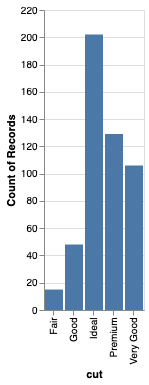

In [5]:
alt.Chart(df).mark_bar().encode(x='cut', y='count()')

Let's now do something fancy. Let's add the clarity dimension to the above plot the by setting `color` to "clarity".

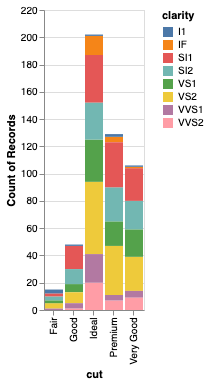

In [6]:
alt.Chart(df).mark_bar().encode(
    x='cut', 
    y='count()', 
    color='clarity')

Let's see how the plot above changes when we set the data type of "clarity" column to ordinal. Of course, the levels of this column is sorted alphabetically by default, which is probably not correct. So, in reality, we would have to supply the correct ordering of levels for sorting.

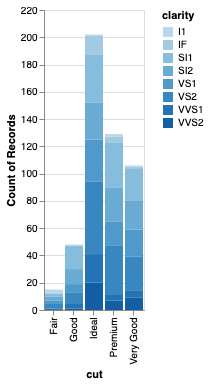

In [7]:
alt.Chart(df).mark_bar().encode(
    x='cut', 
    y='count()', 
    color='clarity:O')

This plot is somewhat dry. So, let's customize it a bit. For customization, we need to be more specific with the $x$ and $y$ axes and also the color parameter by using the `X`, `Y`, and `Color` methods in Altair so that we can supply some additional parameters. Below, we pass in a list for the correct ordering of "cut", which is ordinal. Otherwise, the sorting would be done alphabetically. If you want to skip sorting altogether, you need to say "sort=None".

By default, if an $x$ axis column is categorical, its labels are printed vertically. To change this, we need to specify a label angle as below. We also set the plot width to 500 pixels and add labels to the axes to together with a plot title. These embellishments can be applied to other charts as well.

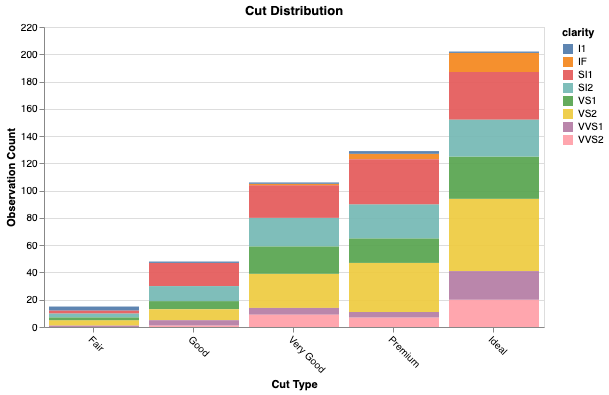

In [8]:
alt.Chart(df, 
          width=500, 
          title='Cut Distribution'
         ).mark_bar(opacity=0.9,
                    color='blue'
          ).encode(x=alt.X('cut', 
                         title='Cut Type', 
                         sort=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                         axis=alt.AxisConfig(labelAngle=45)),
                   y=alt.Y('count()', title='Observation Count'),
                   color=alt.Color('clarity')
          )

## Histograms

Histograms can be plotted with a "bar" mark and we can specify the maximum number of bins we want in our histogram.

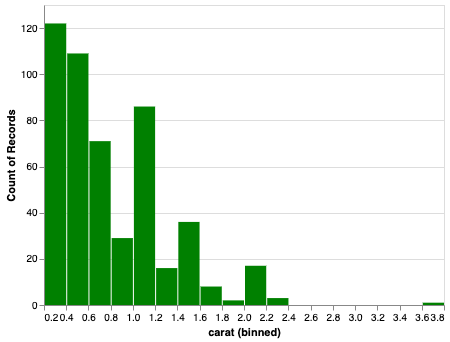

In [9]:
alt.Chart(df).mark_bar(color='green').encode(
    alt.X('carat', bin=alt.Bin(maxbins=20)), 
    y='count()')

We can also specify a "color" parameter for a histogram as below.

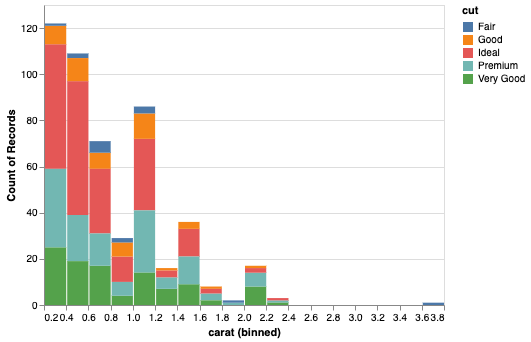

In [10]:
alt.Chart(df).mark_bar().encode(
    alt.X('carat', bin=alt.Bin(maxbins=20)), 
    y='count()',
    color='cut')

## Boxplots

Boxplots are plotted with a "boxplot" mark. Let's display a boxplot for the "carat" column with the full range of values.

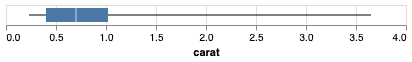

In [11]:
alt.Chart(df).mark_boxplot(extent='min-max').encode(x='carat')

Next, let's use the default value of 1.5 IQR for the "extent" parameter. In this version, outlier values are shown as circles.

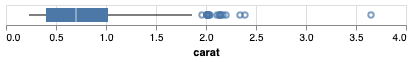

In [12]:
alt.Chart(df).mark_boxplot().encode(x='carat')

We can display multiple boxplots with respect to a categorical column. Below we switch the axes for a vertical display.

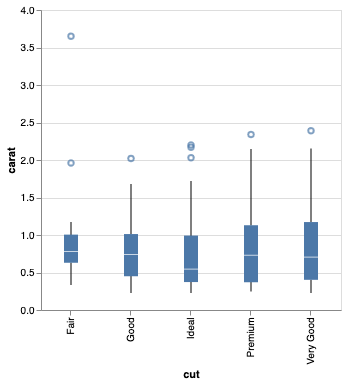

In [13]:
alt.Chart(df, width=300).mark_boxplot().encode(y='carat', x='cut')

## Scatter Plots

Scatter plots are defined by a "point" mark. Let's do a scatter plot for carat vs. price, which are both numerical. 

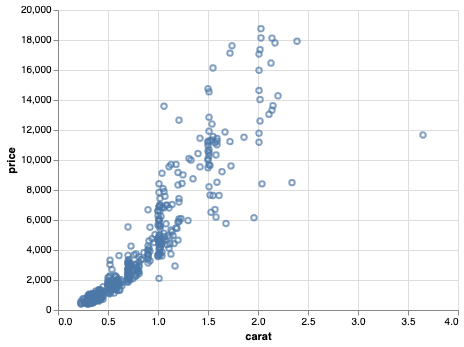

In [14]:
alt.Chart(df).mark_point().encode(x='carat', y='price')

We can add the cut dimension to the above plot by setting the `color` parameter to "cut".

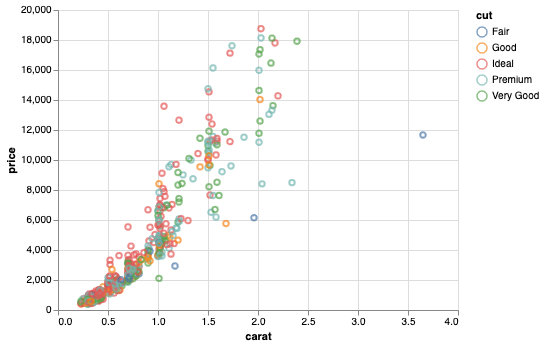

In [15]:
alt.Chart(df).mark_point().encode(x='carat', y='price', color='cut')

## Faceting

We can plot carat vs. price for each cut type separately, which is called "faceting".

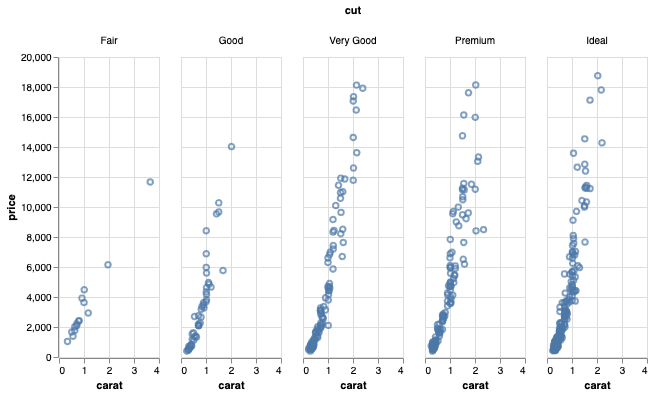

In [16]:
alt.Chart(df, width=100).mark_point().encode(
    x='carat', 
    y='price'
).facet(column=alt.Column('cut', 
        sort=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']))

## Line Plots

Line plots are specified by a "line" mark.  The diamonds dataset is not quite appropriate for a line plot, so let's use the `cars` dataset in the `Vega` module.

In [17]:
import altair as alt
from vega_datasets import data

cars_df = data.cars()

print(cars_df.shape)

cars_df.head()

(406, 9)


,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Let's plot mean of miles per gallon vs. years as a line plot. The default behavior in Altair, which is sometimes problematic, is that an $x$ or $y$ axis corresponding to a numerical column always starts at zero. To prevent this, we need to set "zero scaling" to False as below.

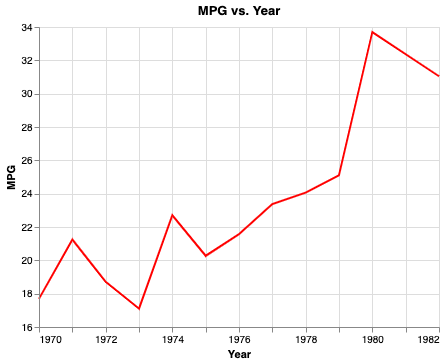

In [18]:
lines = alt.Chart(cars_df, title='MPG vs. Year').mark_line(color='red').encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', title='MPG',
            scale=alt.Scale(zero=False))
)

lines

We can also set the `color` parameter to "Origin" as below to visualize MPG vs. year for each country of origin.

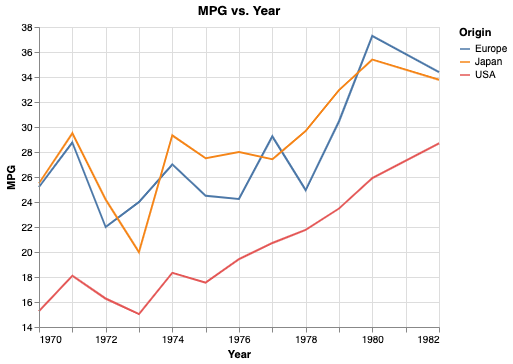

In [19]:
lines_origin = alt.Chart(cars_df, title='MPG vs. Year').mark_line(color='red').encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', title='MPG',
            scale=alt.Scale(zero=False)),
    color='Origin'
)

lines_origin

## Layered Charts

Let's add a 95% confidence interval to the aggregate MPG vs. year plot above together with the data points. Notice how we add three plots of lines, bands, and points together using the simple "+" sign below. This is called a "layered" chart. Layered charts allow us to overlay multiple charts on the same set of axes for better visualization. We can also define "compound" charts by horizontal or vertical stacking of different charts. Please see the module documentation [here](https://altair-viz.github.io/user_guide/compound_charts.html) for more information.

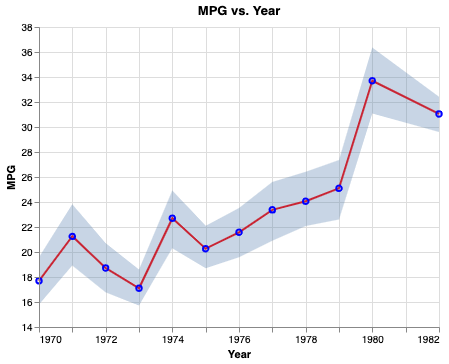

In [20]:
bands = alt.Chart(cars_df).mark_errorband(extent='ci').encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', title='MPG')
)

points = alt.Chart(cars_df).mark_point(color='blue').encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', title='MPG')
)

lines + bands + points

As illustrated above, Altair is a powerful library of plotting functions and it's extremely customizable. We cover only basics of Altair in this tutorial and refer the reader to Altair's [website](https://altair-viz.github.io/index.html) for further details.

***
www.featureranking.com